In [1]:
%matplotlib inline


# Zoom Window


This example shows how to connect events in one window, for example, a mouse
press, to another figure window.

If you click on a point in the first window, the z and y limits of the
second will be adjusted so that the center of the zoom in the second
window will be the x,y coordinates of the clicked point.

Note the diameter of the circles in the scatter are defined in
points**2, so their size is independent of the zoom



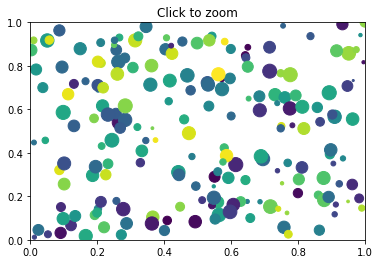

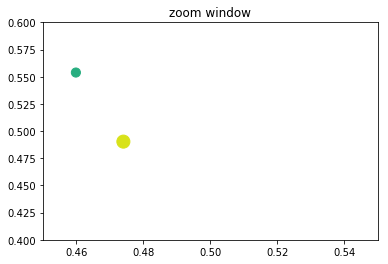

In [2]:
from matplotlib.pyplot import figure, show
import numpy as np
figsrc = figure()
figzoom = figure()

axsrc = figsrc.add_subplot(111, xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
axzoom = figzoom.add_subplot(111, xlim=(0.45, 0.55), ylim=(0.4, .6),
                             autoscale_on=False)
axsrc.set_title('Click to zoom')
axzoom.set_title('zoom window')
x, y, s, c = np.random.rand(4, 200)
s *= 200


axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def onpress(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', onpress)
show()